<a href="https://colab.research.google.com/github/solparrondo/TP-1-Netflix/blob/main/TP_1_Netflix_History.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importando librerias

In [212]:
#Importamos las librerias que vamos a utilizar
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Guardando el dataframe

In [213]:
#Guardamos el csv del historial de Netflix en un dataframe
df = pd.read_csv('NetflixHistory.csv')

## Ejercicio a: Contabilizar el dispositivo con el que más títulos se reprodujeron.

Eliminando los dispositivos que queremos ignorar y no tomar en cuenta

In [214]:
devices = df['Device Type']
ignore = df['Supplemental Video Type']
value_list = ['Sony PS4', 'Netflix Windows App - Cadmium Windows Mobile', 'Apple iPhone 6s', 'Apple iPhone 7 Plus (CDMA)', 'Chrome PC (Cadmium)', 'Samsung 2015 NT14M DTV Smart TV', 'iPhone 5S GSM', 'Google Chromecast V3 Streaming Stick']
def esValido(disp): #funcion para traer todos los dispositivos que no esten en value_list
  return disp not in value_list #devuelve todos los valores de la columna "Device Type" menos los que estan en la lista value_list

df = df[df["Device Type"].apply(esValido)] #se le aplica la funcion esValido a la columna "Device Type" para que en el dataframe solo aparezcan los dispositivos que queremos

Contamos cuantas veces aparecen cada dispositivo y tomamos el mayor

In [215]:
df["Device Type"].value_counts().head(1) 

Apple Apple TV 4 Apple TV    3519
Name: Device Type, dtype: int64

## Ejercicio B: Encontrar la película con más ocurrencias y la película con mayor duración total

Haciendo un dataframe solo con peliculas y series (sin trailers, hooks, recaps, etc), filtrandolo y hacer otro dataframe para quedarnos solo con las peliculas 

In [216]:
#funcion para traer todas las pelis y series que no tengan nada en la columna Supplemental Video Type
def moviesAndSeries (videoType):
  return videoType is np.NaN #devuelve los titulos que su valor en la columna "Supplemental Video Type" es nulo

noVideoType = df[df["Supplemental Video Type"].apply(moviesAndSeries)]

#funcion para traer solo las pelis
def IsMovie(movie):
    return "Capítulo" not in movie #devuelve los titulos que no incluyen "capitulo" 

movies = noVideoType[noVideoType["Title"].apply(IsMovie)] #se le aplica la funcion isMovie a la columna "Title"

### Pelicula mas frequente

Contamos cuantas veces aparecen cada pelicula y tomamos el mayor

In [217]:
movies["Title"].value_counts() #devuelve cuantas veces aparece tal titulo 
mostFrequentMovie = movies["Title"].mode() #devuelve el top 1 de mas vistas
mostFrequentMovie

0                     El código enigma
1    Star Wars: El Imperio contraataca
dtype: object

### Pelicula con mayor duración

Pasando las duraciones a segundos

In [218]:
#Divide el string de tiempo de formato h:m:s y guarda cada seccion en una variable distinta, pasa las variables a segundos y las suma
def toSeconds(time_str):
  try:
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s) #devuelve el tiempo en segundos
  except:
    return time_str

In [219]:
#Funcion equivalente, pero usando pandas
def toSeconds2(time_str):
  timedelta = pd.Timedelta(time_str)
  timedelta.total_seconds()

In [220]:
movies["Duration"] = movies["Duration"].apply(toSeconds2) #se le aplica la funcion toSeconds2 a la columna "Duration"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [221]:
mayorAMenorDuracion = movies.sort_values(by = "Duration", ascending = False) #ordena los valores de la columna "Duration" de mayor a menor 
mostDurationMovie = mayorAMenorDuracion["Title"].iloc[0] #toma el valor más grande, el primero
mostDurationMovie

'Mr. Holmes'

##Generar un TOP “N” de series vistas y graficar.


###Por tiempo visto

Filtramos las series, a partir del dataframe con solo peliculas y series, y las guardamos en un dataframe

In [222]:
#funcion para tomar solo los titulos que contengan la palabra "Capitulo", de la columna "Title", es decir, solo las series
def IsSerie(serie):
    return "Capítulo" in serie 

series = noVideoType[noVideoType["Title"].apply(IsSerie)] #se le aplica la funcion isSerie a la columna "Title" del dataframe de solo pelis y series
series["Duration"] = series["Duration"].apply(toSeconds) #se le aplica la funcion toSeconds a la columna "Duration" del dataframe con solo series

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Simplificar el nombre de la serie, tomando solo su titulo

In [223]:
#funcion para acortar el titulo de las series
def shortenSeriesTitle(seriesTitle):
  return seriesTitle.split(':')[0] #divide el titulo cada vez que aparece ":" y toma el primer valor, devuelve solo el titulo, es decir, el nombre

series["Title"] = series["Title"].apply(shortenSeriesTitle) #se le aplica la funcion shortenSeriesTitle a la columna "Title" del dataframe de solo series


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


Sumamos todas las duraciones de todos sus respectivos titulos y agarramos solo las primeras tres

In [224]:
n = 3
series_duration = series.groupby('Title')['Duration'].sum() 
mayorAMenorDuracionSeries = series_duration.sort_values(axis = 0, ascending = False) #ordena de mayor a menor las duraciones de cada serie
topNMostDurationSeries = mayorAMenorDuracionSeries.keys()[:n] #toma los primeros n valores 
topNMostDurationSeries

Index(['Cómo conocí a tu madre', 'Community', 'Friends'], dtype='object', name='Title')

Creamos un grafico de los titulos y la cantidad de tiempo que se reproducieron

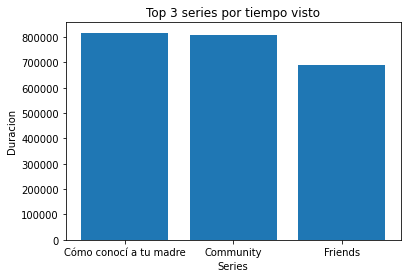

In [242]:
fig, ax = plt.subplots()
ax.set_ylabel('Duracion') #se le asigna el titulo a la linea y
ax.set_xlabel('Series') #se le asigna el titulo a la linea x
plt.title ('Top ' + str(n) + ' series por tiempo visto') #se asigna el titulo al grafico
plt.bar(topNMostDurationSeries, mayorAMenorDuracionSeries.tolist()[:n]) #se le manda los valores que queremos que se muestren 
plt.show()

###Por ocurrencias

Contamos la cantidad de veces que aparece cada titulo de cada serie y las tres que mayor ocurrencias tienen

In [226]:
topNMostFrequentSeries = series['Title'].value_counts().head(n) 
topNMostFrequentSeries

Community                 870
Cómo conocí a tu madre    780
Friends                   604
Name: Title, dtype: int64

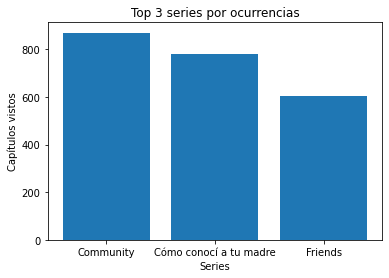

In [243]:
fig, ax = plt.subplots() 
ax.set_ylabel('Capítulos vistos') #se le asigna el titulo a la linea y
ax.set_xlabel('Series') #se le asigna el titulo a la linea x
plt.title ('Top ' + str(n) + ' series por ocurrencias') #se asigna el titulo al grafico
plt.bar(topNMostFrequentSeries.keys(), topNMostFrequentSeries.tolist()) #se le manda los valores que queremos que se muestren
plt.show()

##Visualizar una semana de reproducciones genérica, en función a las reproducciones por día y por horario de todos los años.


Creamos una funcion donde separamos el string de la columna "Start Time" en la fecha y el tiempo, la cual retorna solo la fecha

In [229]:
allTitlesStartTime = df["Start Time"]
def dateStartTime(startTimeTitles): 
  return startTimeTitles.split(" ") [0]

date = allTitlesStartTime.apply(dateStartTime)


Nos fijamos en que dia de la semana cayeron esas fechas, creamos una nueva columna en el dataframe y las guardamos ahi

In [230]:
dateTime = pd.to_datetime(date, format = "%Y-%m-%d").dt.day_name() #devuelve que dia de la semana cayo tal fecha

In [231]:
if "Day" in df.columns: #Comprueba que no exista ya una columna llamada "Day"
  df.reset_index()
else:
  df.insert(4, "Day", dateTime, allow_duplicates=True) #se agrega una nueva columna "Day" en el dataframe para guardar el dia de la semana en el que cayo cada fecha

Creamos una funcion donde separamos el string de la columna "Start Time" en la fecha y el tiempo, tomamos el tiempo, lo dividimos en hora, segundos y minutos y retornamos solo la hora

In [232]:
def hourStartTime(startTimeTitles): 
  hour = startTimeTitles.split(" ") [1]
  return hour.split(":")[0]

hourTime = allTitlesStartTime.apply(hourStartTime)

Creamos una nueva columna en el dataframe y las guardamos las horas ahi

In [233]:
if "Hour" in df.columns: #Comprueba que no exista ya una columna llamada "Hour"
  df.reset_index()
else:
  df.insert(5, "Hour", hourTime, allow_duplicates=True) #se agrega una nueva columna "Hour" en el dataframe para guardar la hora del dia en el que vio cada titulo


In [234]:
df['Day-Hour'] = df[['Day', 'Hour']].apply(lambda x: ' '.join(x), axis = 1) #se agrega una nueva columna "Day-Hour" en el dataframe para guardar el dia de la semana + la hora en que se vio cada titulo

In [235]:
cantDayHour = df["Day-Hour"].value_counts()#se cuenta cuantas veces aparece (cuantos titulos se vio) cada dia en cada hora

Creamos un dataframe con las horas como indice, los dias como columnas y los values son la cantidad de veces que aparecen en la columna "Day-Hour" y lo convertimos en un heatmap

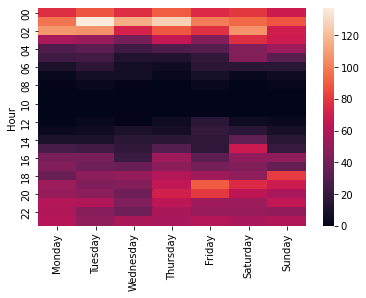

In [245]:
dias = ("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
horas = ("00", "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23")
df_grafico = pd.DataFrame({}, columns=dias)
df_grafico["Hour"] = horas
df_grafico = df_grafico.set_index(["Hour"])


for dia in dias:
  for hora in horas:
    for i in cantDayHour.index.tolist():
      x = dia + " " + hora
      if (i == x):
        df_grafico.loc[hora, dia] = cantDayHour.get(i)
      

df_grafico = df_grafico.fillna(0)
ax = sns.heatmap(df_grafico)
ax


##Contabilizar la cantidad de títulos vistos por año, graficar su variación a través de los años.

Dividimos la fecha, y agarramos solo el año en el que se reproducio. Contamos cuantas veces aparece cada año, los ordenamos de mayor a menor y lo guardamos en una lista

In [237]:
allTitlesStartTime2 = df["Start Time"]

#funcion para tomar solo el año en que se reprodujo cada titulo
def shortenStartTimeYear(startTimeTitles):
  return startTimeTitles.split('-')[0] #divide cada valor de la columna "Start Time" por cada vez que aparece "-" y toma el primer valor, es decir, se devuelve solo el año

allTitlesStartTime2["Start Time"] = allTitlesStartTime2.apply(shortenStartTimeYear)

onlyYear = allTitlesStartTime2["Start Time"].value_counts().sort_index() #cuenta cuantas veces aparece cada año (cuantos titulos se vio cada año) y los ordena
onlyYear

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


2015    1191
2016     807
2017     795
2018     916
2019     550
2020    1016
2021     722
2022     294
Name: Start Time, dtype: int64

Separamos el año con la cantidad de veces que aparecen en dos variables distintas

In [238]:
años = onlyYear.keys() 
cantAños = onlyYear.tolist()

Creamos un grafico a partir de los datos previos

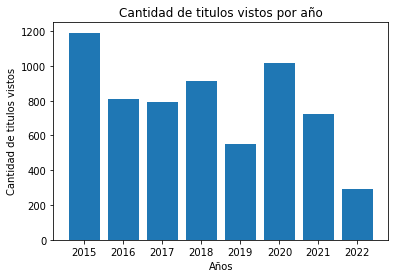

In [239]:
fig, ax = plt.subplots()
ax.set_ylabel('Cantidad de titulos vistos')
ax.set_xlabel('Años')
plt.title ('Cantidad de titulos vistos por año')
plt.bar(años, cantAños)
plt.show()

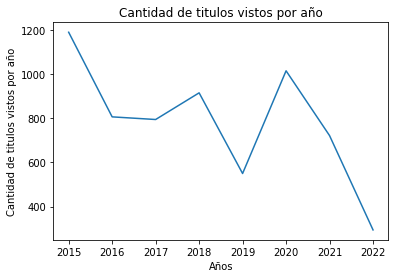

In [240]:
plt.plot(años, cantAños)
plt.title('Cantidad de titulos vistos por año')
plt.xlabel('Años')
plt.ylabel('Cantidad de titulos vistos por año')
plt.show()

##Total de días de todos los títulos reproducidos.

Pasamos las duraciones de todos los titulos vistos a segundos, los sumamos y luego los pasamos a dias

In [241]:
titles = df["Duration"] 

titlesDurationInSeconds = titles.apply(toSeconds)

totalDias = int(titlesDurationInSeconds.sum() / 86400)

print("El total de días de todos los titulos reproducidos es " + str(totalDias))

El total de días de todos los titulos reproducidos es 99
